In [1]:
from addon_modules import open_hdf5
import numpy as np                    # imports library for arrays
from tqdm import tqdm
import matplotlib.pyplot as plt

# Below I import my own library. On my laptop they are located in home+'/Dropbox/research/master_code'
# Change that line of code so that it matches the location of the files on your laptop
import sys
from os.path import expanduser
home = expanduser("~")
data_dir = home+'/dataCubes/'


sys.path.append(home+'/HALL_RESEARCH_GROUP/core_code')
from my_func import * # my module with some helpful functions
from my_plot import * # my module with some plotting functions
from my_pca  import * # my module with some PCA functions


In [2]:
#import dataCubes

image_cube = open_hdf5(data_dir+'new_mwc_images.h5') 
ev_cube = open_hdf5(data_dir+'mwc_eigen_vectors.h5') 
amplitudes = open_hdf5('amplitudes_mwc') 

In [3]:
np.array(amplitudes).shape

(374, 374)

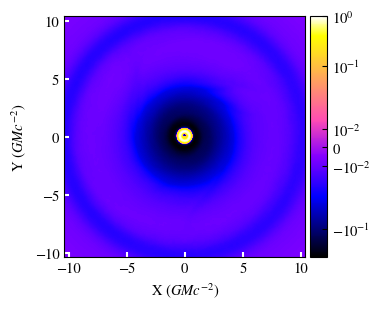

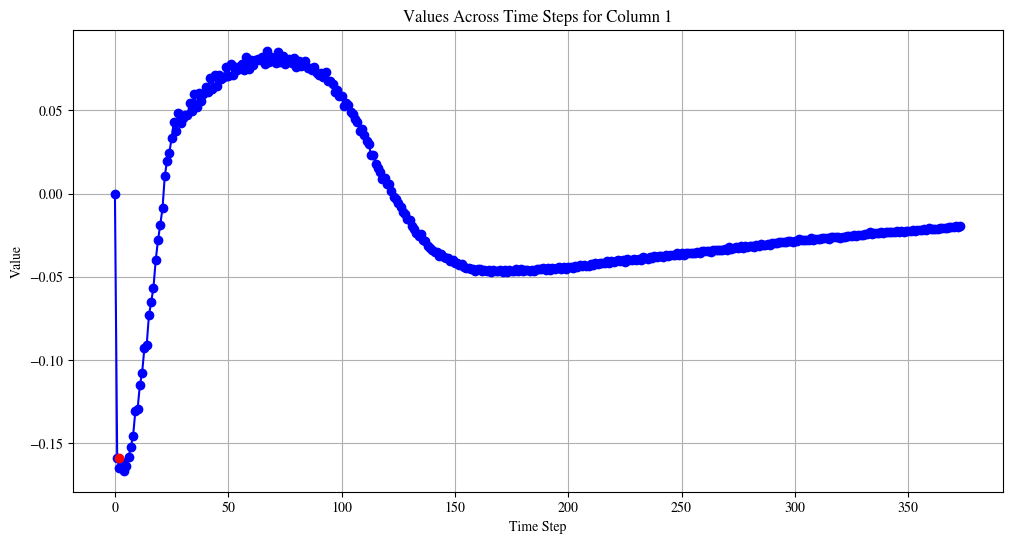

In [11]:

# Choose the column you want to visualize (e.g., column 5)
column_index = 1 #this is actually the visualization of pca number i+1

snapshot = 2

plot_image(image_cube[snapshot,:,:],zoom=True, scale='symlog', output="test.png") #view particular snapshot
plot_image(ev_cube[column_index,:,:],zoom=True, scale='symlog') #view particular eigen vector




# Create time array for rows

values = [row[column_index] for row in amplitudes] # extract all values accros column 10. Thus show the values of the amplitudes for different snapshots
# Plot the values of the chosen column across rows

time_steps = range(len(values))
plt.figure(figsize=(12, 6))
plt.scatter(snapshot,values[snapshot-1],color='red', zorder=5, label='Highlighted Point') #Highlight amplitude of ev in snapshot


plt.plot(time_steps, values, marker='o', linestyle='-', color='b')
plt.xlabel('Time Step')
plt.ylabel('Value')
plt.title(f'Values Across Time Steps for Column {column_index}')
plt.grid(True)
plt.show()

In [5]:
import tkinter as tk
from tkinter import ttk
from PIL import Image, ImageTk





In [29]:
import tkinter as tk
from PIL import Image, ImageTk
import numpy as np
import matplotlib.pyplot as plt

class SlideshowApp:
    def __init__(self, root, image_cube, ev_cube, amplitudes, custom_plot):
        self.root = root
        self.image_cube = image_cube
        self.ev_cube = ev_cube
        self.amplitudes = amplitudes
        self.snapshot = 0
        self.column_index = 0
        self.max_snapshot = image_cube.shape[0] - 1
        self.max_eigenvector = ev_cube.shape[0] - 1

        self.custom_plot = custom_plot
        
       
        # Initialize references to images
        self.snapshot_img = None
        self.ev_img = None
        self.plot_img = None
        
        # Set up the UI
        self.setup_ui()
        self.update_images()
        self.update_plot()

    def setup_ui(self):
        #create and place Title

        self.title_image_label = tk.Label(self.root, text="Snapshot Image", font=("Arial", 12))
        self.title_image_label.grid(row=0, column=0, padx=2, pady=2, sticky="n")

        # Title for the eigenvector image
        self.title_ev_label = tk.Label(self.root, text="Eigen Vector Image", font=("Arial", 12))
        self.title_ev_label.grid(row=0, column=1, padx=2, pady=2, sticky="n")

        # Create and place labels for images and plot
        self.label_image = tk.Label(self.root)
        self.label_image.grid(row=0, column=0, padx=2, pady=2, sticky="nsew")
        
        self.label_ev = tk.Label(self.root)
        self.label_ev.grid(row=0, column=1, padx=2, pady=2, sticky="nsew")

        self.label_plot = tk.Label(self.root)
        self.label_plot.grid(row=1, column=0, columnspan=2, padx=5, pady=5, sticky="nsew")

        # Create navigation buttons
        

        self.prev_button = tk.Button(self.root, text="Previous Snapshot", command=self.prev_snapshot)
        self.prev_button.grid(row=2, column=0, padx=5, pady=5, sticky="ew")

        self.next_button = tk.Button(self.root, text="Next Snapshot", command=self.next_snapshot)
        self.next_button.grid(row=2, column=1, padx=5, pady=5, sticky="ew")

        self.prev_ev_button = tk.Button(self.root, text="Previous EV", command=self.prev_eigenvector)
        self.prev_ev_button.grid(row=2, column=2, padx=5, pady=5, sticky="ew")

        self.next_ev_button = tk.Button(self.root, text="Next EV" ,command=self.next_eigenvector)
        self.next_ev_button.grid(row=2, column=3, padx=5, pady=5, sticky="ew")

        # Configure row and column weights to ensure proper resizing
        self.root.grid_rowconfigure(0, weight=2)  # Row for images
        self.root.grid_rowconfigure(1, weight=1)  # Row for plot
        self.root.grid_columnconfigure(0, weight=1)  # Column for image
        self.root.grid_columnconfigure(1, weight=1)  # Column for EV
        self.root.grid_columnconfigure(2, weight=1)  # Column for buttons
        self.root.grid_columnconfigure(3, weight=1)  # Column for buttons

    def update_images(self):

        self.custom_plot(self.image_cube[self.snapshot, :, :],zoom=True, scale='symlog', output="snapshot.png")
        snapshot_img_data = Image.open('snapshot.png')
        self.snapshot_img = ImageTk.PhotoImage(snapshot_img_data)
        self.label_image.config(image=self.snapshot_img)


        # Update Eigen Vector Image
        self.custom_plot(self.ev_cube[self.column_index, :, :],zoom=True, scale='symlog', output="ev.png")
        ev_img_data  = Image.open('ev.png')
        self.ev_img = ImageTk.PhotoImage(ev_img_data)
        self.label_ev.config(image=self.ev_img)

    def update_plot(self):
        plt.figure(figsize=(10, 4))
        values = [row[self.column_index] for row in self.amplitudes]
        time_steps = range(len(values))

        plt.scatter(self.snapshot, values[self.snapshot], color='red', zorder=5, label='Amplitude')
        plt.plot(time_steps, values, marker='o', linestyle='-', color='b')
        plt.xlabel('Snapshot')
        plt.ylabel('Amplitude')
        plt.title(f'Amplitudes accross Snapshots for Eigen Vector {self.column_index}')
        plt.grid(True)
        plt.legend()

        plt.savefig("plot.png")
        plt.close()

        plot_img_data = Image.open("plot.png")
        self.plot_img = ImageTk.PhotoImage(plot_img_data)
        self.label_plot.config(image=self.plot_img)

    def prev_snapshot(self):
        if self.snapshot > 0:
            self.snapshot -= 1
        self.update_images()
        self.update_plot()

    def next_snapshot(self):
        if self.snapshot < self.max_snapshot:
            self.snapshot += 1
        self.update_images()
        self.update_plot()

    def prev_eigenvector(self):
        if self.column_index > 0:
            self.column_index -= 1
        self.update_images()
        self.update_plot()

    def next_eigenvector(self):
        if self.column_index < self.max_eigenvector:
            self.column_index += 1
        self.update_images()
        self.update_plot()




In [30]:
# Example usage
root = tk.Tk()
root.title("Interactive Slideshow")


app = SlideshowApp(root, image_cube, ev_cube, amplitudes,plot_image)
root.mainloop()

/home/juvism/HALL_RESEARCH_GROUP/core_code/my_plot.py:262: RuntimeWarning: invalid value encountered in divide
  if norm == True: array = array/(np.max(array))*norm_num
